In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Movie_Rating.csv')
df.replace(-1, np.nan, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Risposta                                            27 non-null     int64  
 1   Nome                                                27 non-null     object 
 2   Q01_Movie Rating->1. Oppenheimer (2023)             24 non-null     float64
 3   Q01_Movie Rating->2. Barbie (2023)                  18 non-null     float64
 4   Q01_Movie Rating->3. Poor Things (2023)             14 non-null     float64
 5   Q01_Movie Rating->4. The shape of water (2017)      11 non-null     float64
 6   Q01_Movie Rating->5. Frozen (2013)                  22 non-null     float64
 7   Q01_Movie Rating->6. Caesar must die (2012)         2 non-null      float64
 8   Q01_Movie Rating->7. The Hangover (2009)            17 non-null     float64
 9   Q

### 3.4.1 Extract A

In [4]:
A = np.array(df.drop(columns = ['Risposta', 'Nome']))
print('Matrix A:')
print(A)

Matrix A:
[[ 3.  1.  2. nan  5. nan  5. nan  2. nan]
 [ 4. nan nan nan  2. nan nan nan nan nan]
 [ 4.  5.  4.  5.  5. nan  4.  5.  4. nan]
 [ 4.  2. nan nan  4. nan  3. nan  4. nan]
 [ 5.  1. nan  3.  3.  3.  5.  2.  3. nan]
 [ 3. nan  4. nan nan nan  3.  5.  4. nan]
 [ 4.  3.  2. nan  3. nan  5.  4.  4. nan]
 [ 5.  2.  5.  4.  3. nan nan nan nan nan]
 [ 3. nan nan nan nan nan  3.  4.  5.  3.]
 [ 5.  1. nan nan  5. nan  4. nan  5. nan]
 [ 5. nan nan  4.  2. nan nan nan  5. nan]
 [ 4.  3.  4. nan  4. nan nan nan  3. nan]
 [nan nan  3. nan nan nan  4. nan nan nan]
 [nan  4.  4.  5.  2. nan  4.  5.  5. nan]
 [ 4.  1.  3.  4.  3. nan  3.  5. nan  3.]
 [ 5.  1.  4.  4.  1. nan  1.  5.  2.  4.]
 [nan  3.  5. nan  3. nan nan nan nan nan]
 [ 5. nan nan  3.  1. nan  3.  5.  4. nan]
 [ 5.  3. nan  5.  1. nan  4.  5.  3.  4.]
 [ 5. nan nan nan nan nan  4.  5.  5. nan]
 [ 5.  4. nan nan  3. nan  4. nan nan nan]
 [ 4. nan nan nan  5. nan nan nan  3.  4.]
 [ 4. nan nan  4.  2. nan nan nan  4. nan]
 

### 3.4.2 Funk SVD for rank-2 approx of PQ*ix

In [5]:
np.nan_to_num(A, nan = 0)

array([[3., 1., 2., 0., 5., 0., 5., 0., 2., 0.],
       [4., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [4., 5., 4., 5., 5., 0., 4., 5., 4., 0.],
       [4., 2., 0., 0., 4., 0., 3., 0., 4., 0.],
       [5., 1., 0., 3., 3., 3., 5., 2., 3., 0.],
       [3., 0., 4., 0., 0., 0., 3., 5., 4., 0.],
       [4., 3., 2., 0., 3., 0., 5., 4., 4., 0.],
       [5., 2., 5., 4., 3., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 3., 4., 5., 3.],
       [5., 1., 0., 0., 5., 0., 4., 0., 5., 0.],
       [5., 0., 0., 4., 2., 0., 0., 0., 5., 0.],
       [4., 3., 4., 0., 4., 0., 0., 0., 3., 0.],
       [0., 0., 3., 0., 0., 0., 4., 0., 0., 0.],
       [0., 4., 4., 5., 2., 0., 4., 5., 5., 0.],
       [4., 1., 3., 4., 3., 0., 3., 5., 0., 3.],
       [5., 1., 4., 4., 1., 0., 1., 5., 2., 4.],
       [0., 3., 5., 0., 3., 0., 0., 0., 0., 0.],
       [5., 0., 0., 3., 1., 0., 3., 5., 4., 0.],
       [5., 3., 0., 5., 1., 0., 4., 5., 3., 4.],
       [5., 0., 0., 0., 0., 0., 4., 5., 5., 0.],
       [5., 4., 0., 

In [6]:
# Center A
column_means = np.nan_to_num(A, nan = 0).mean(axis=0)
A_centered = np.nan_to_num(A, nan = 0) - column_means
print('Matrix A_centered:')
print(np.around(A_centered, decimals=3))

Matrix A_centered:
[[-0.852 -0.741  0.037 -1.667  2.63  -0.296  2.667 -2.222 -1.037 -0.667]
 [ 0.148 -1.741 -1.963 -1.667 -0.37  -0.296 -2.333 -2.222 -3.037 -0.667]
 [ 0.148  3.259  2.037  3.333  2.63  -0.296  1.667  2.778  0.963 -0.667]
 [ 0.148  0.259 -1.963 -1.667  1.63  -0.296  0.667 -2.222  0.963 -0.667]
 [ 1.148 -0.741 -1.963  1.333  0.63   2.704  2.667 -0.222 -0.037 -0.667]
 [-0.852 -1.741  2.037 -1.667 -2.37  -0.296  0.667  2.778  0.963 -0.667]
 [ 0.148  1.259  0.037 -1.667  0.63  -0.296  2.667  1.778  0.963 -0.667]
 [ 1.148  0.259  3.037  2.333  0.63  -0.296 -2.333 -2.222 -3.037 -0.667]
 [-0.852 -1.741 -1.963 -1.667 -2.37  -0.296  0.667  1.778  1.963  2.333]
 [ 1.148 -0.741 -1.963 -1.667  2.63  -0.296  1.667 -2.222  1.963 -0.667]
 [ 1.148 -1.741 -1.963  2.333 -0.37  -0.296 -2.333 -2.222  1.963 -0.667]
 [ 0.148  1.259  2.037 -1.667  1.63  -0.296 -2.333 -2.222 -0.037 -0.667]
 [-3.852 -1.741  1.037 -1.667 -2.37  -0.296  1.667 -2.222 -3.037 -0.667]
 [-3.852  2.259  2.037  3.333 -0

In [7]:
def FunkSVD(centered_mat, latent_features=2, learning_rate=0.01, regularization = 0.1, iters=100):

    
    # Init shapes
    n_users = centered_mat.shape[0]
    n_items = centered_mat.shape[1]
    num_complete = np.count_nonzero(~np.isnan(centered_mat))
    
    # initialize random matrices for user and item
    user_mat = np.random.rand(n_users, latent_features) #P
    item_mat = np.random.rand(latent_features, n_items) #Q*
    
    # init sse
    sse_accum = 0
    

    # for loop
    for iteration in range(iters):

        # update sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-item pair
        for i in range(n_users):
            for j in range(n_items):
                
                # if the rating exists
                if centered_mat[i, j] >= 0:
                    
                    # compute the error as the actual minus the dot product of the user and item latent features
                    diff = centered_mat[i, j] - np.dot(user_mat[i, :], item_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    user_mat[i, :] += learning_rate * (2 * diff * item_mat[:, j] - regularization * user_mat[i, :])
                    item_mat[:, j] += learning_rate * (2 * diff * user_mat[i, :] - regularization * item_mat[:, j])
        
    return user_mat, item_mat

np.random.seed(42)
P, Q_star = FunkSVD(A_centered, latent_features=2, learning_rate=0.0125, regularization = 0.1 ,iters=200)
Q = Q_star.T
# Rank 2 approximation of PQ*
rank_2_approximation = np.dot(P, Q_star)

print('PQ* rank-2 approximation:')
print(np.around(rank_2_approximation, decimals=3))

PQ* rank-2 approximation:
[[ 1.232  3.447  0.38   2.575  1.782  4.732  2.888  3.005  2.543  3.824]
 [ 0.179  0.387  0.55   0.628  0.394  0.99   0.315  0.661  0.38   0.721]
 [ 0.923  2.186  2.019  2.821  1.811  4.607  1.799  3.04   1.944  3.447]
 [ 0.401  0.596  2.431  2.026  1.214  2.954  0.456  2.028  0.88   2.02 ]
 [ 0.882  2.722 -0.852  1.264  0.967  2.697  2.302  1.639  1.794  2.358]
 [ 0.568  1.12   2.231  2.245  1.386  3.441  0.9    2.32   1.219  2.453]
 [ 0.626  1.779  0.068  1.243  0.871  2.326  1.493  1.469  1.289  1.9  ]
 [ 0.329  0.303  2.813  2.084  1.221  2.927  0.203  2.037  0.742  1.934]
 [ 0.585  1.34   1.481  1.893  1.204  3.045  1.099  2.019  1.238  2.253]
 [ 0.987  2.116  3.137  3.522  2.206  5.528  1.72   3.697  2.102  4.016]
 [ 0.919  2.387  1.091  2.337  1.551  4.025  1.985  2.609  1.916  3.124]
 [ 0.566  1.158  2.036  2.141  1.33   3.314  0.936  2.227  1.21   2.382]
 [ 0.746  1.901  1.041  1.976  1.301  3.361  1.578  2.188  1.558  2.587]
 [ 0.905  2.113  2.111  2

### 3.4.3 Plot

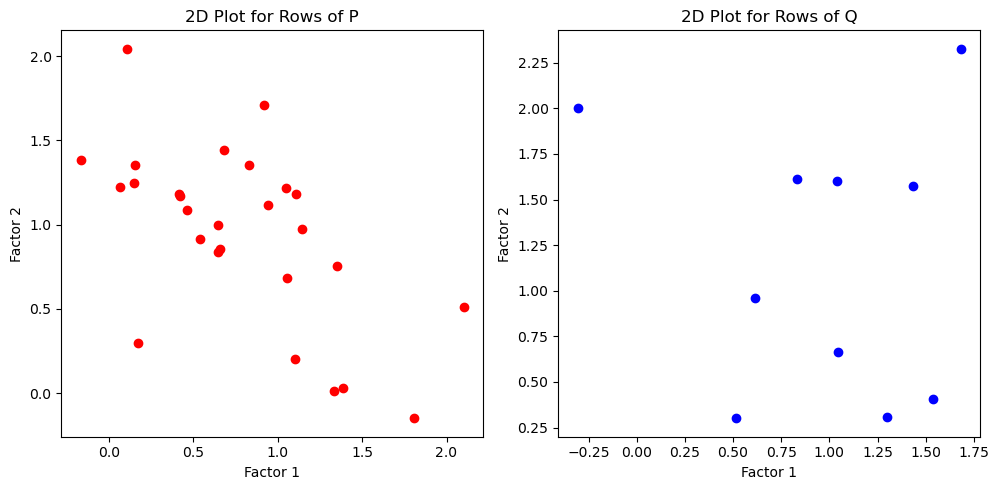

In [8]:
import matplotlib.pyplot as plt

# Plot for  P
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.scatter(P[:, 0], P[:, 1], color='red')
plt.title('2D Plot for Rows of P')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

# Plot for Q
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.scatter(Q[:, 0], Q[:, 1], color='blue')
plt.title('2D Plot for Rows of Q')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

plt.tight_layout()
plt.show()

**Interpretation:**

P matrix shows the features in the users, while Q matrix shows the features in the items (movies). For the User matrix we see that there is 1 main trend which is a cloud that gos from high in the factor 2 to low, while it goes to low in factor 1 to high. But there is a point in the lower left quadrant that seems to be different from all other points. Maybe this persons rated the movies in a very adverse way to the average movie rating and that is why this point is alone there. We can also se a linear negative relationship between both factors, indicating that there is people who are more prone to factor 1 while this makes less prone to factor 2 and voce-versa. As for the Q plot, we see the item (movies) factors. Apparently there is no clear clustering or relation between factor 1 and 2 in this matrix. There is also one single point in the upper left quadrant and all the other points seem to form a bigger random cloud. We could also force a line that tells us that there is a linear positive relationship between the two factors in Q
, meaning that the more 1 factor is present in the movies, the more the other factor is. Also there are two movies that are far from the rest, this could be because they have very low ratings while the others have good ratings on average